## _Quantum Superdense Coding_<a id='superdensecoding'></a>

Quantum superdense coding is the dual protocol of quantum teleportation, whereby two classical bits of information are transmitted using only one qubit and a previously shared entangled state. It was devised by Charles Bennett (IBM) and Stephen Wiesner in [1992](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.69.2881). 

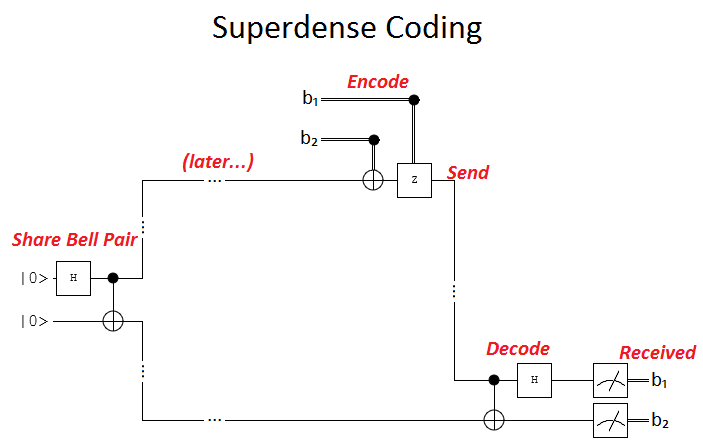


As illustrated above, and as in quantum teleportation, the protocol starts out with a shared entangled state between the sender (Alice) and the receiver (Bob):
$$|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)$$
The first qubit, denoted by subscript $A$, belongs to Alice, and the second qubit, $B$, belongs to Bob.

Alice wants to send a two bit message to Bob, 00, 01, 10, or 11.  She performs a single qubit operation on her qubit which transforms the entangled state according to which message she wants to send:
- For a message of **00**: Alice applies $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$. The resultant state would be $|\psi_{00}\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$
- For a message of **01**: Alice applies $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$. The resultant state would be $|\psi_{01}\rangle = \frac{1}{\sqrt{2}}(|1_A 0_B\rangle + |0_A 1_B\rangle)$  
- For a message of **10**: Alice applies $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$. The resultant state would be $|\psi_{10}\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle - |1_A 1_B\rangle)$ 
- For a message of **11**: Alice applies $XZ = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$. The resultant state would be $|\psi_{11}\rangle = \frac{1}{\sqrt{2}}(- |1_A 0_B\rangle + |0_A 1_B\rangle $

The key to superdense coding is that these four states, $|\psi_{00}\rangle, |\psi_{01}\rangle, |\psi_{10}\rangle, |\psi_{11}\rangle$ (otherwise known as the [Bell states](https://en.wikipedia.org/wiki/Bell_state)), are orthonormal and are hence distinguishable by a quantum measurement.

In [20]:
# useful additional packages 


# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np
%matplotlib inline


In [2]:
# Creating registers
sdq = QuantumRegister(2)
sdc = ClassicalRegister(2)

# Quantum circuit to make the shared entangled state 
superdense = QuantumCircuit(sdq, sdc)
superdense.h(sdq[0])
superdense.cx(sdq[0], sdq[1])

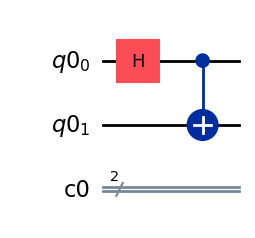

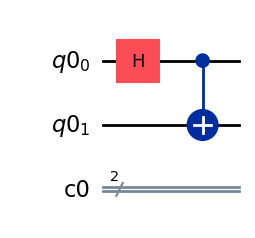

In [3]:
superdense.draw('mpl')

Alice now needs to decide what two bit message she wants to transmit to Bob, ($00$, $01$, $10$, or $11$), and perform the corresponding to transformation ($I$, $X$, $Z$ or $XZ$ respectively) to her qubit $q_A$ ($q_0$). In this case, she encodes $11$:

In [4]:
# For 00, do nothing
# superdense.id(sdq[0])

# For 01, apply $X$
#superdense.x(sdq[0])

#For 01, apply $Z$
superdense.z(sdq[0])

# For 11, apply $XZ$
# superdense.z(sdq[0]) 
# superdense.x(sdq[0])
superdense.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q0"), index=0>, <Qubit register=(2, "q0"), index=1>), clbits=())

# other way to code the above 4 options if you dont beilive the passing message bit code 

In [5]:
# bit_string_list  = ['11']  # Change this to '00', '01', '10', or '11' to send different messages
# for i, bit in enumerate(bit_string_list):
#     print(f"Sending bit string: {bit}")

In [6]:
# bit_string_list  = ['11']  # Change this to '00', '01', '10', or '11' to send different messages
# for i, bit in enumerate(bit_string_list):
#     if bit == '00':
#         pass
#     elif bit == '01':
#         superdense.x(sdq[0])
#     elif bit == '10':
#         superdense.z(sdq[0])
#     elif bit == '11':
#         superdense.z(sdq[0])
#         superdense.x(sdq[0])
    
  
#     superdense.barrier()
   

Bob now needs to 'decode' the message that Alice sent him. Since measurement in Qiskit is only possible in the standard computational basis, he does this by:
1. Applying a $CNOT$ from $q_A$ to $q_B$
2. Then a $H$ on $q_A$ 
3. And measuring $q_A$ and $q_B$

Recalling that $q_A = q_0$ and $q_B = q_1$, this looks like:

In [7]:
  # Decoding the message
superdense.cx(sdq[0], sdq[1])
superdense.h(sdq[0])
superdense.measure(sdq[0], sdc[0])
superdense.measure(sdq[1], sdc[1])

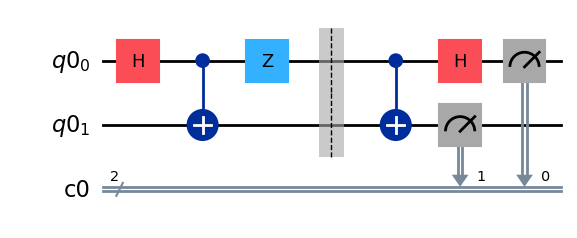

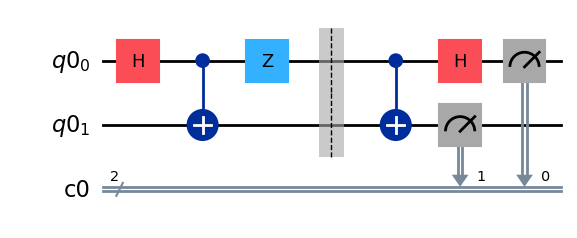

In [8]:
superdense.draw(output='mpl')

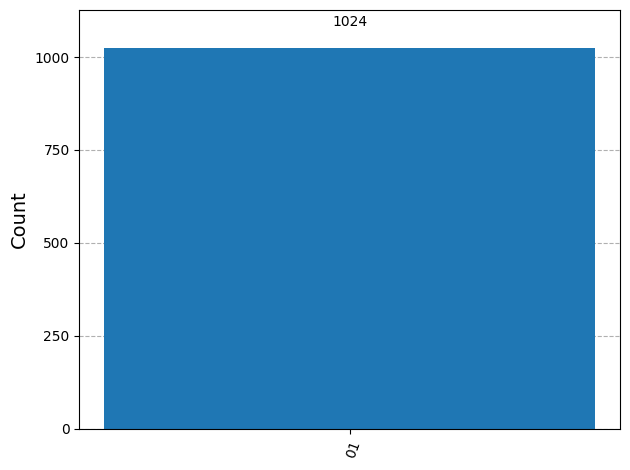

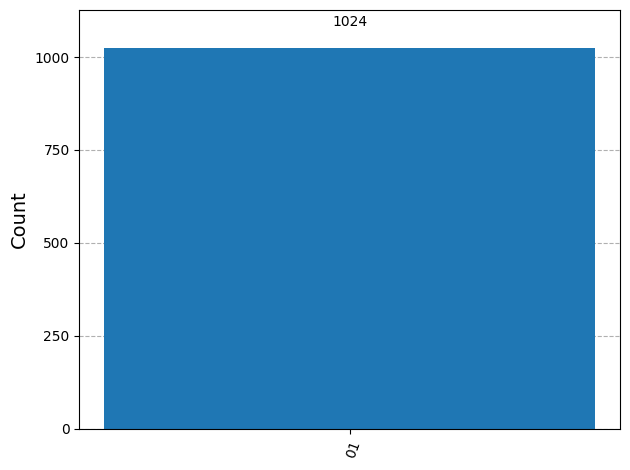

In [9]:
backend = Aer.get_backend('qasm_simulator') # run on local simulator by default 

# Uncomment the following lines to run on a real device
# IBMQ.load_account()
# from qiskit.providers.ibmq import least_busy
# backend = least_busy(IBMQ.backends(operational=True, simulator=False))
# print("the best backend is " + backend.name())

superdense_job = backend.run(superdense)
superdense_result = superdense_job.result()

plot_histogram(superdense_result.get_counts(superdense))

# Quantum Teleportation

Alice and Bob are two friends who met long ago. Later, Bob moved to some place X. When they met, they generated a Bell pair together, and each kept one qubit of the pair for themselves. Now Alice wants to communicate with Bob, but can not send quantum messages to X. Is there any way they can communicate? For simplicity, let us assume that Alice wants to send just one qubit of information to Bob. (Can we use some property of the Bell pair to our advantage? Think!)

Note: It is not necessary that Alice knows the complete classical description of the state she wants to send to Bob, infact, she might not know anything about that state. If she tries to measure it to learn something about it, then she has obviously destroyed the state.

This is the problem of quantum teleportation, which we will now solve!

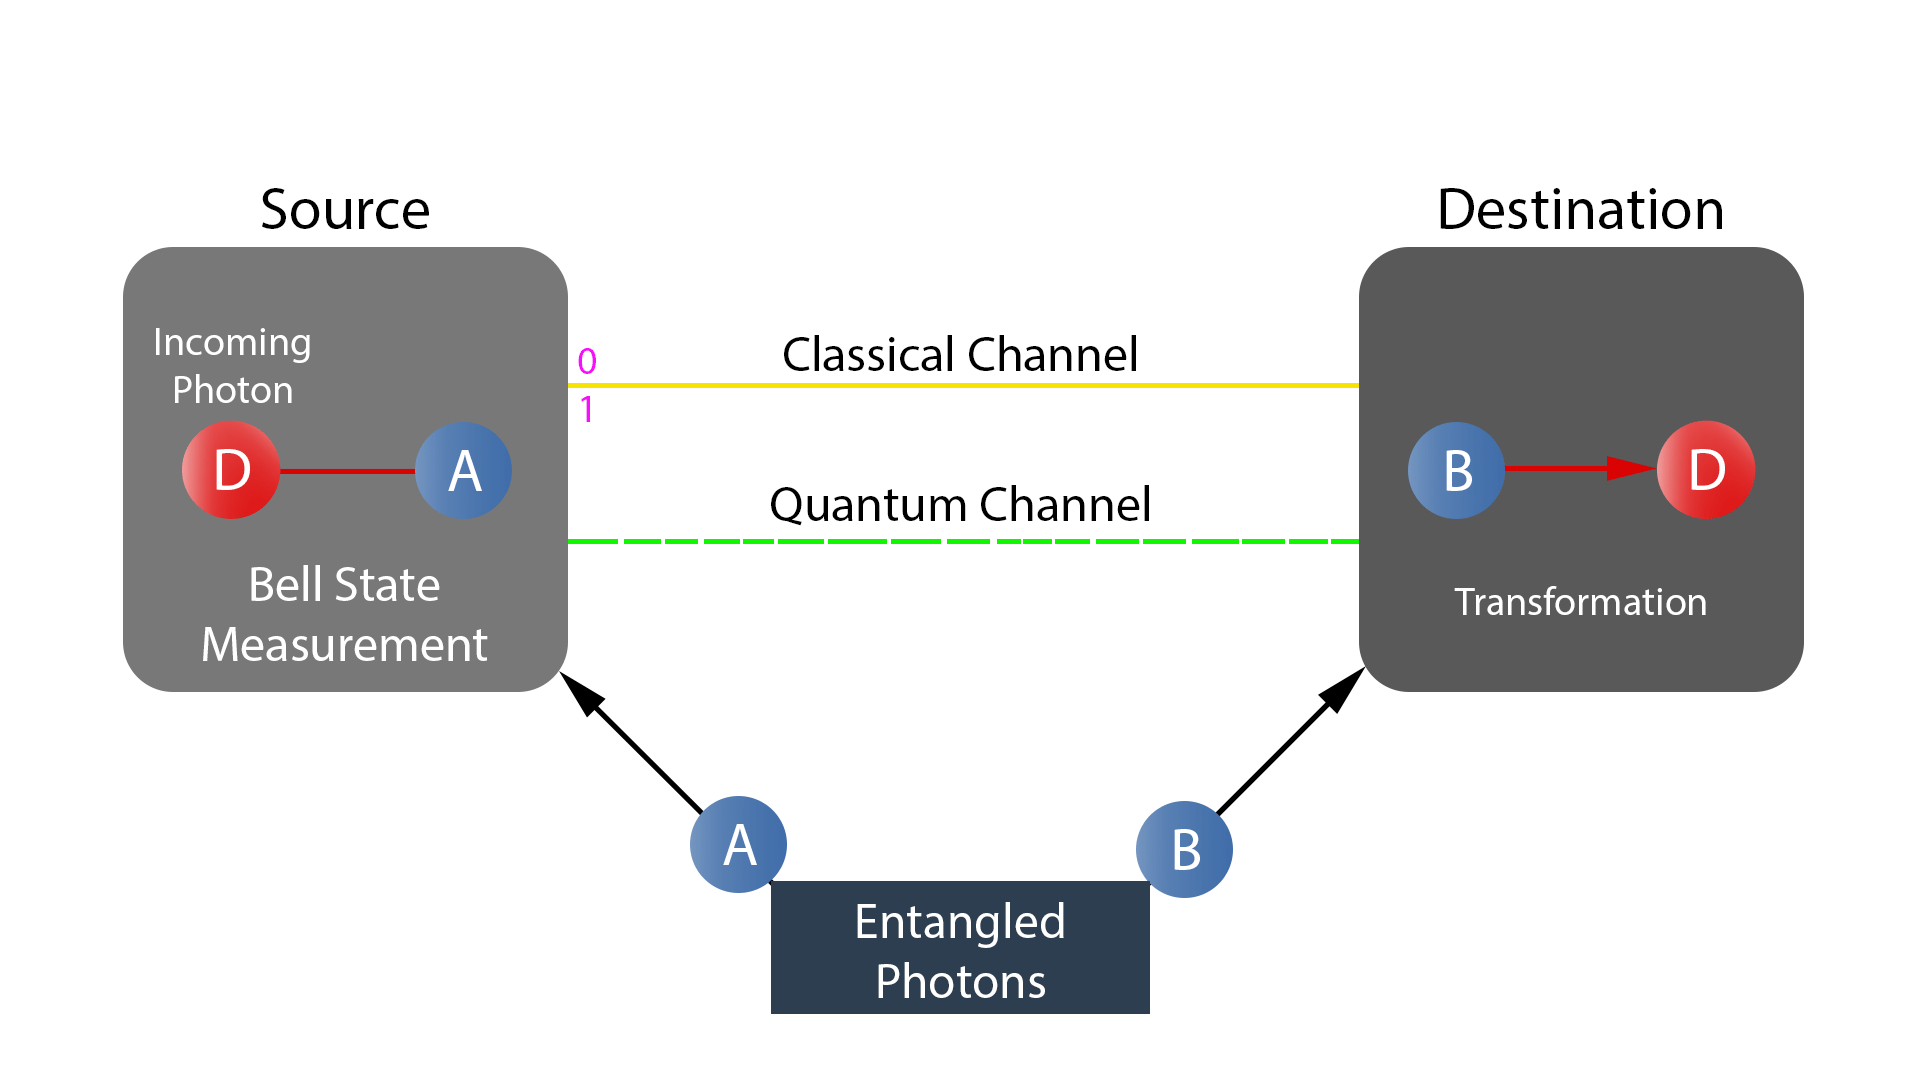



### Quantum Teleportation Step Description

Alice performs a **controlled-NOT (CNOT)** operation on the pair **(A, Q)**,  
where **Q** is the **control** qubit and **A** is the **target** qubit.  
She then applies a **Hadamard (H)** operation on **Q**.

After these operations, Alice measures both **A** and **Q** in the **computational (standard) basis**.  
Let:

- **a** = measurement outcome of qubit **A**  
- **b** = measurement outcome of qubit **Q**

Alice then transmits the classical bits **a** and **b** to **Bob**.

---

### Bob’s Operations

Upon receiving **a** and **b**, Bob performs the following operations on his qubit **B**:

| Measurement outcome (**a**, **b**) | Operation on **B** | Description      |
|:----------------------------------:|:------------------:|:----------------|
| (0, 0) | **I** | Identity (no operation) |
| (0, 1) | **Z** | Phase flip |
| (1, 0) | **X** | Bit flip |
| (1, 1) | **ZX** | Phase and bit flip |

---

### Summary

- If **a = 1**, Bob applies an **X (bit-flip)** gate.  
- If **b = 1**, Bob applies a **Z (phase-flip)** gate.  
- The final operation on **B** depends on the combination of **(a, b)** received.

In [10]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

We want to teleport the state $|\psi\rangle$ = $\alpha |0\rangle + \beta |1\rangle$ (where $\alpha$ and $\beta$ may be unknown). Hence the overall state that we input in our circuit is $$|\psi_0\rangle = |\psi\rangle|\beta_{00}\rangle$$ (where $\beta_{00} = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. Here the first two qubits belong to Alice and the last qubit belongs to Bob. Since Bob is on Mars, we can not apply a two qubit gate that acts on one of Alice's qubits and on Bob's qubit.

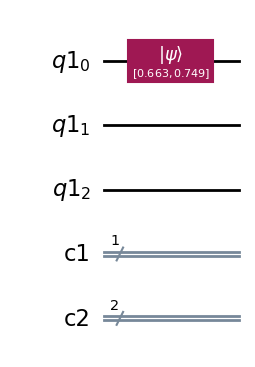

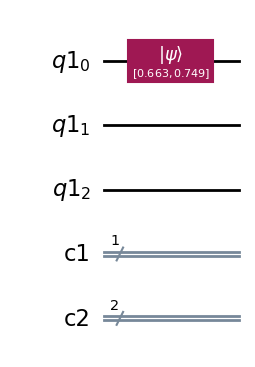

In [11]:
sim = Aer.get_backend('statevector_simulator')

qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(2)            # we will need seperates registers for using 'c_if' later.
qc = QuantumCircuit(qr,crz,crx)

alpha = np.random.rand()
beta = np.sqrt(1-alpha**2)

psi = Statevector([alpha, beta])
qc.initialize(psi,0)                  # 'psi' can't be unknown to us as we are creating it here. Let us take '-' state as our 'psi'. This is done by operating X and H gate on the q0 i.e., H.X|0>
                                      # We will verify later if the '-' is been teleported.
qc.draw('mpl')

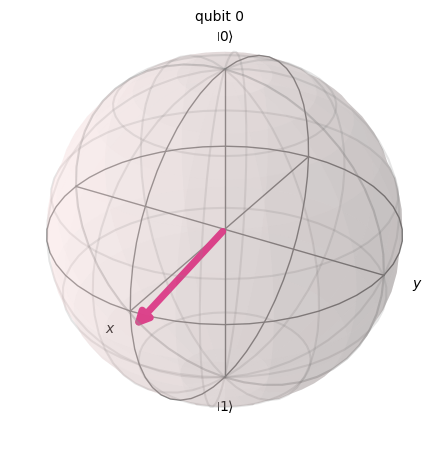

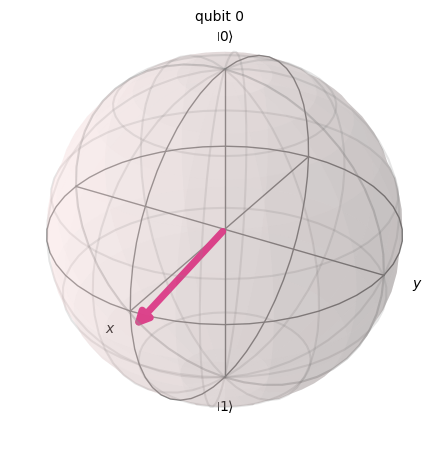

In [12]:
plot_bloch_multivector(psi)

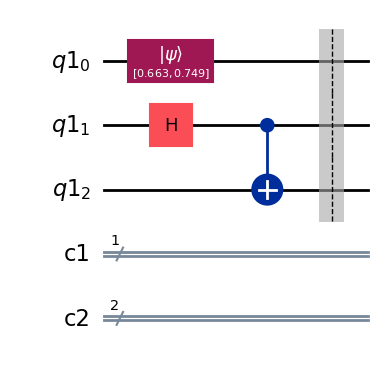

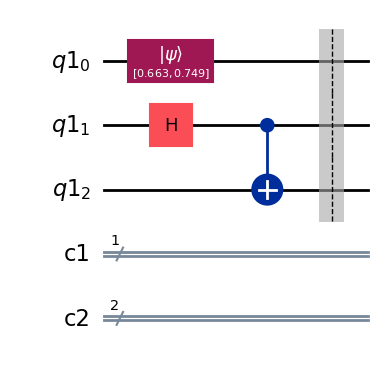

In [13]:
qc.h(1)
qc.cx(1,2)                            # creating a bell state
qc.barrier()                          # Use barrier to separate steps, everything till this barrier is just intialisation.
qc.draw('mpl')

What do we do now? We try to transfer some information from the qubit that Alice wants to send to Bob, to the one qubit she has from the Bell pair. We do this by trying to create entanglement between the two qubits Alice has. Since we saw that measurement of one qubit of a Bell pair determines the measurement outcome for the second qubit, Alice might be able to use this property to transfer some information to Bob.

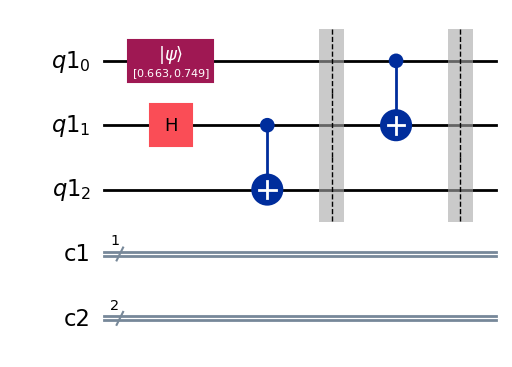

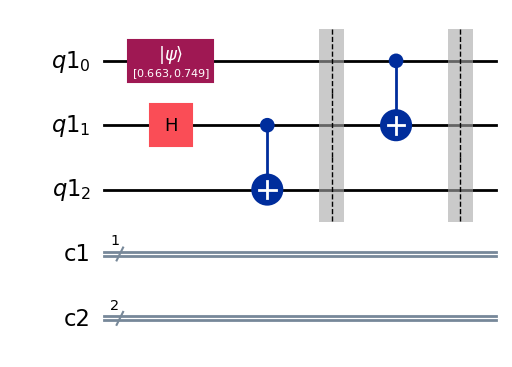

In [14]:
qc.cx(0,1) # '0' and '1' are with Alice and '2' is with Bob.
# psi_1 prepared.
qc.barrier()                          # Use barrier to separate steps
qc.draw('mpl')

Exercise: Compute the state $|\psi_1\rangle$. (Assuming $|\psi\rangle$ = $\alpha |0\rangle + \beta |1\rangle$)

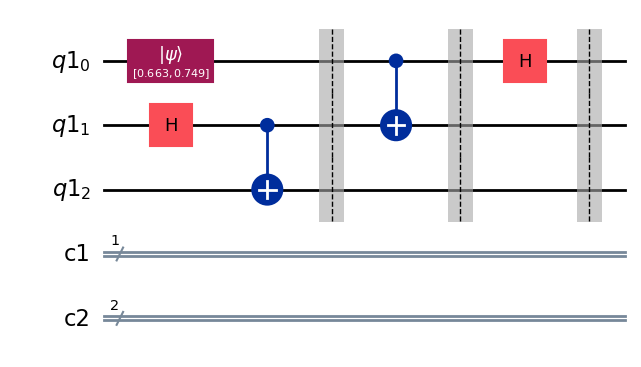

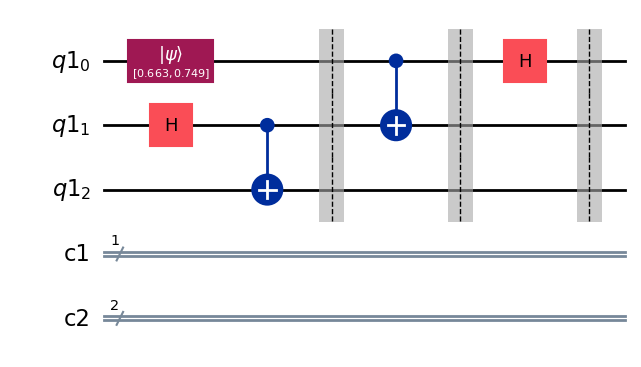

In [15]:
qc.h(0)
# psi_2 prepared.
qc.barrier()
qc.draw('mpl')


Now that Alice has created some entanglement, she performs a measurement on her qubits (hopefully, that will convey some information to Bob by appropriately modifying Bob's qubits).

Note: If none of this makes sense now, do not worry, I am talking in very vague terms. Once you see the entire protocol, it will make sense!

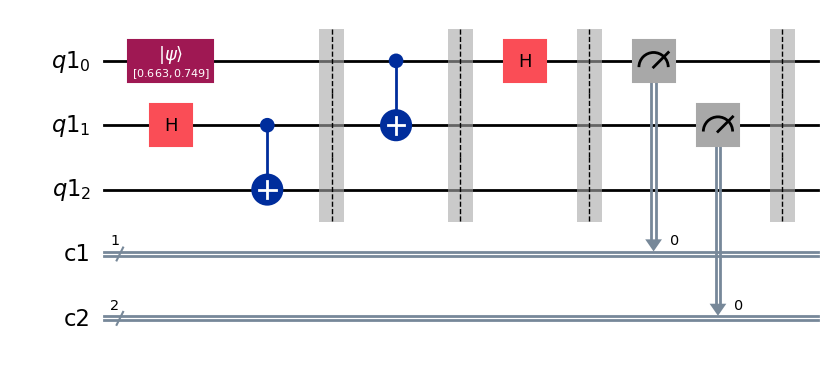

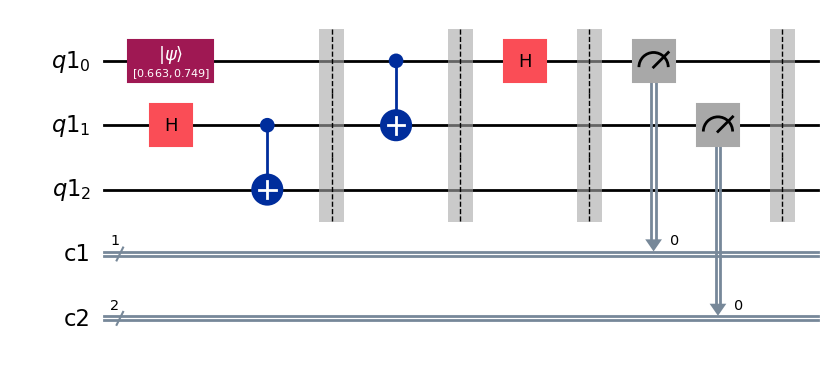

In [16]:
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw('mpl')

Now that Alice has done her measurement, hopefully Bob has a state that contains something useful about Alice's state. To help Bob recover the state that Alice wanted to send, she sends him the two classical bits she measured (remember, she was allowed to do classical communication). What does Bob do now?

Exercise: Compute the state of the system right now (for different possible measurement outcomes), and try to figure out a possible strategy Bob could use to recover Alice's original state in his qubit.

Note: If you are having trouble, first try the above exercise for the specific state $|-\rangle$ that we have considered in our code, then try to extend your analysis to a general $|\psi\rangle$.

If you could not figure out what Bob should do, worry not, we tell it next!

In [17]:

 
with qc.if_test((crx, 1)) as else_:
    qc.x(2)
with else_:
    qc.id(2)
with qc.if_test((crz, 1)) as else_:
    qc.z(2)
with else_:
    qc.id(2)

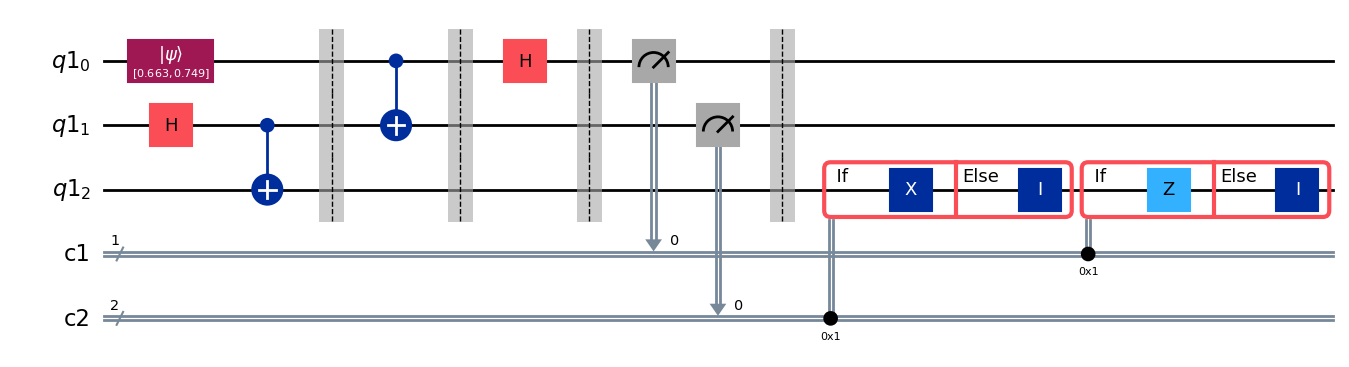

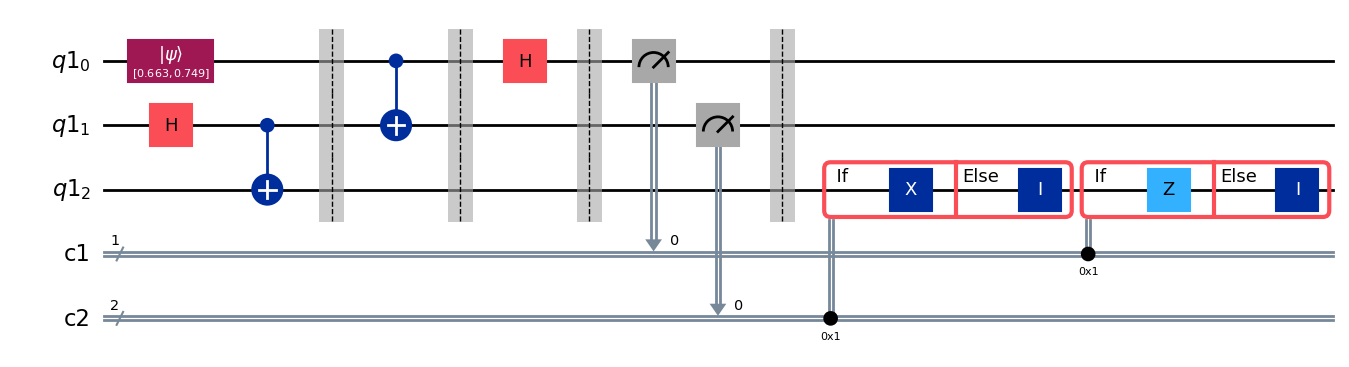

In [18]:
# qc.x(2).c_if(crx,1)  # 'c_if' compares a classical register with a value (either 0 or 1) and performs the 
# qc.z(2).c_if(crz,1)  # operation if they are equal.
qc.draw('mpl')

Exercise: Verify that Bob indeed gets the state $|\psi\rangle$ that Alice wanted to send!

Now let us verify the same for our code! We expect that Bob gets the state $|-\rangle$. So if we perform a measurement in the $\{|+\rangle, |-\rangle\}$ basis, we should get measurement outcome 1. But we already saw how to do that in our last tutorial!

Alpha (|0>): (0.662691479443283+0j)
Beta (|1>): (0.748892517704158+0j)


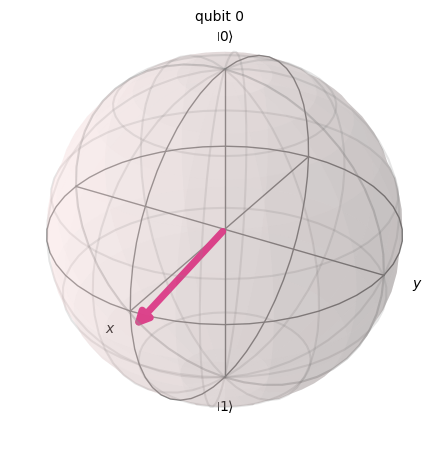

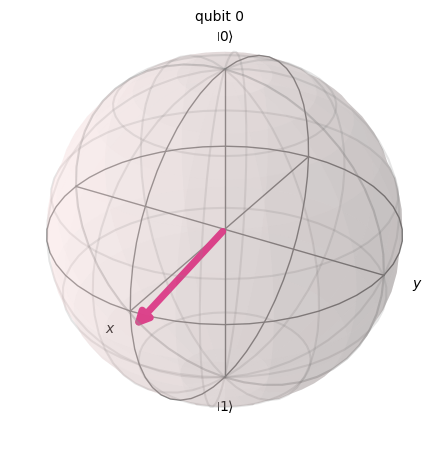

In [19]:
job =  sim.run(qc)
result = job.result()
statevector = result.get_statevector()
statevector_obj = Statevector(statevector)

# Partial trace to get the reduced density matrix of the third qubit (index 2)
reduced_density_matrix = partial_trace(statevector_obj, [0, 1])

statevector_qubit_2 = reduced_density_matrix.data.diagonal()

# Extract alpha and beta (the coefficients of |0> and |1> for the third qubit)
alpha = np.sqrt(statevector_qubit_2[0])
beta = np.sqrt(statevector_qubit_2[1])

print(f"Alpha (|0>): {alpha}")
print(f"Beta (|1>): {beta}")

# Optional: Visualize the reduced state on the Bloch sphere
plot_bloch_multivector(reduced_density_matrix)